<a href="https://colab.research.google.com/github/yohanesnuwara/geostatistics/blob/main/project_notebooks/WITSML_realtime_drilling_volve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup

plt.style.use("classic")

## Trying with azure (doesn't work)

In [ ]:
# !pip install azure-storage-blob
!pip install azure-storage-blob==2.1.0

     |████████████████████████████████| 92kB 3.8MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 
  Found existing installation: azure-storage-blob 12.6.0
    Uninstalling azure-storage-blob-12.6.0:
      Successfully uninstalled azure-storage-blob-12.6.0


In [ ]:
from azure.storage.blob import BlockBlobService

azure_storage_account_name = 'dataplatformblvolve'
sas_token = 'sv=2018-03-28&sr=c&sig=4Yw7alkYTIdHRpvnWp%2F9z0F6MT5LBuUqJVYYk4%2F3N7U%3D&se=2021-02-10T13%3A57%3A40Z&sp=rl'

# Create a service and use the SAS 
sas_blob_service = BlockBlobService( 
    account_name=azure_storage_account_name, 
    sas_token=sas_token,
)

filename = 'WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-14/1/log/1/1/1'

blob = sas_blob_service.list_blobs('pub', filename)
for b in blob:
    print(b.name)

Client-Request-ID=8c699004-54b6-11eb-b26a-0242ac1c0002 Retry policy did not allow for a retry: , HTTP status code=Unknown, Exception=HTTPSConnectionPool(host='dataplatformblvolve.blob.core.windows.net', port=443): Max retries exceeded with url: /pub?restype=container&comp=list&prefix=WITSML+Realtime+drilling+data%2FNorway-StatoilHydro-15_%2447%24_9-F-14%2F1%2Flog%2F1%2F1%2F1&sv=2018-03-28&sr=c&sig=4Yw7alkYTIdHRpvnWp%2F9z0F6MT5LBuUqJVYYk4%2F3N7U%3D&se=2021-02-10T13%3A57%3A40Z&sp=rl (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fc04a57ccf8>: Failed to establish a new connection: [Errno -2] Name or service not known',)).


AzureException: ignored

## Well 15/9-F-15

In [ ]:
WITSML_file = "/content/practice-witsml-realtime-drilling-data.xml"

# Reading the WITSML file
with open(WITSML_file) as f:
    data = f.read()
 
## Parse the WITSML file using the Beautiful library
soup = BeautifulSoup(data, 'xml')
set([str(tag.name) for tag in soup.find_all()])
# Print the tags in the file
temp = set([str(tag.name) for tag in soup.find_all()])
print (soup.find_all('mnemonicList')[0].text)


Depth,LAGMWT,Time,EditFlag,TORQUE,MOTOR_RPM,STRATESUM,MWOUT,LAGMWDIFF,MWIN,BIT_RPM,DXC,MUDRETDEPTH,PUMP,LAGMTEMP,RigActivityCode,MRIN,FLOWOUT,ROP_AVG,LAGMRES,TOTGAS,MROUT,MTIN,LAGMRDIFF,FLOWIN,WOB,ONBOTTOM_TIME,ECDBIT,MTOUT,BIT_DIST,SURF_RPM,LAGMTDIFF


In [ ]:
## Process the log files
# Get name of logs in the file
log_names = soup.find_all('mnemonicList')
 
# The units in the file
unit_names = soup.find_all('unitList')
 
# Define that the header is the 'mnemonic - unit' this simiplifies the pandas dataframe format
header = [i + ' - ' + j for i, j in zip(log_names[0].string.split(","), unit_names[0].string.split(","))]
 
# define out pandas dataframe - the columns are the header - a concatenation of the mnemonic and the unit, the data is parsed by looping over every
# list found under the data tag.
data = soup.find_all('data')
df = pd.DataFrame(columns=header,
                  data=[row.string.split(',') for row in data])
 
# replace blank values with nan
df = df.replace('', np.NaN)

# convert to Pandas datetime
datetime = "Time - unitless"
df[datetime] = pd.to_datetime(df[datetime], format="%Y-%m-%dT%H:%M:%S.%fZ")

df

,Depth - m,LAGMWT - kg/m3,Time - unitless,EditFlag - unitless,TORQUE - N.m,MOTOR_RPM - c/s,STRATESUM - Hz,MWOUT - kg/m3,LAGMWDIFF - kg/m3,MWIN - kg/m3,BIT_RPM - c/s,DXC - unitless,MUDRETDEPTH - m,PUMP - Pa,LAGMTEMP - K,RigActivityCode - unitless,MRIN - ohm.m,FLOWOUT - m3/s,ROP_AVG - m/s,LAGMRES - ohm.m,TOTGAS - Euc,MROUT - ohm.m,MTIN - K,LAGMRDIFF - ohm.m,FLOWIN - m3/s,WOB - N,ONBOTTOM_TIME - s,ECDBIT - kg/m3,MTOUT - K,BIT_DIST - m,SURF_RPM - c/s,LAGMTDIFF - K
0,3300,1280,2013-11-28 12:54:29,0,3768.1461,0,0.30077287,1280,0,1280,0.26709381,0.98767405,3299,3112134.6,0,111,0,0.016037011,0.0050745891,0,0.00010829921,0,0,0,0.0066621191,-19762.743,194,1293.6605,0,0.99521129,0.26709381,0
1,3305,1280,2013-11-28 16:48:21,0,20991.543,0,1.6745582,1306.2254,26.225434,1306.2254,1.3141475,0.98767405,3301.7245,17932214,0,111,0,0.038980972,0.004088054,0,0.00018335271,0,0,0,0.037091464,26217.864,1617,1360.874,0,5.995622,1.3147203,0
2,3310,1315.2258,2013-11-28 17:01:59,0,22610.383,0,1.7667643,1320.0146,4.7887933,1320.0146,1.3287059,0.98767405,3301.7245,20878002,0,111,0,0.041079254,0.005159383,0,0.00017616453,0,0,0,0.039133829,83492.293,2435,1382.0713,0,10.997926,1.3286739,0
3,3315,1320.0008,2013-11-28 17:46:39,0,24296.981,0,1.7682853,1320,-0.00081542028,1320,1.4208871,0.98767405,3302.8926,20728354,0,111,0,0.041359136,0.0059714693,0,0.00018825522,0,0,0,0.039167519,97087.882,3442,1381.7741,0,15.997564,1.4201163,0
4,3320,1320,2013-11-28 18:02:50,0,24931.313,0,1.7833046,1320,-1.5581106E-06,1320,1.5959484,0.98767405,3306.1559,20553813,0,111,0,0.043607078,0.0054191089,0,0.0002761118,0,0,0,0.039500196,54793.206,4333,1381.5933,0,20.990649,1.5939307,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,4665,1320,2013-12-01 10:14:40,0,27075.188,0,1.8005778,1320,0,1320,2.9942539,0.98767405,4646.0212,22818638,303.15,111,0,0.041173456,0.0086479196,0,0.0021896747,0,303.15,0,0.039882797,31494.846,184072,1451.4642,0,1365.9964,2.993031,-303.15
274,4670,1320,2013-12-01 10:24:18,0,27096.219,0,1.8000003,1320,0,1320,2.9958723,0.98767405,4650.4826,24994158,303.15,111,0,0.040583939,0.0086448466,0,0.002631289,0,303.15,0,0.039870007,50567.593,184650,1451.5601,0,1370.9935,2.9952813,-303.15
275,4675,1320,2013-12-01 10:33:56,0,26505.85,0,1.8,1320,0,1320,2.9973859,0.98767405,4654.9462,24811432,303.15,111,0,0.041103929,0.0086417765,0,0.002907449,0,303.15,0,0.03987,54281.007,185228,1451.6859,0,1375.9907,2.9969968,-303.15
276,4680,1320,2013-12-01 10:49:02,0,25727.699,0,1.8,1320,0,1320,2.9975983,0.98767405,4660.0805,24782599,303.15,111,0,0.041148973,0.0086491551,0,0.0030348893,0,303.15,0,0.03987,47797.661,185810,1451.8115,0,1380.9896,2.9974702,-303.15


In [ ]:
df["TORQUE - N.m"] = pd.to_numeric(df["TORQUE - N.m"])

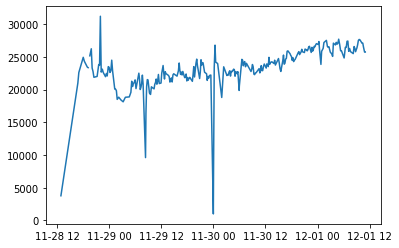

In [ ]:
plt.plot(df["Time - unitless"], df["TORQUE - N.m"])
plt.show()

## Well 15/9-F-1

In [2]:
!git clone https://github.com/yohanesnuwara/geostatistics

Cloning into 'geostatistics'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 80 (delta 33), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (80/80), done.


In [5]:
import glob
import os

# Glob files
folder = "/content/geostatistics/data/volve-realtime/well_15_9_F-1"
paths = sorted(glob.glob(os.path.join(folder, "*.xml")))

dataframes = []
for i in paths:
  # Reading the WITSML file
  with open(i) as f:
      data = f.read()
  
  # Parse the WITSML file using the Beautiful library
  soup = BeautifulSoup(data, 'xml')

  # Mnemonic list
  mne = soup.find_all('mnemonicList')
  lognames = mne[0].string.split(",")  

  data = soup.find_all('data')
  df = pd.DataFrame(columns=lognames,
                    data=[row.string.split(',') for row in data])

  # Append all dataframes
  dataframes.append(df)

# Concatenate all individual dataframes
df = pd.concat(dataframes, axis=0).reset_index(drop=True)

# Replace blank values with nan
df = df.replace('', np.NaN)

# Convert to Pandas datetime
df["TIME"] = pd.to_datetime(df["TIME"], format="%Y-%m-%dT%H:%M:%S.%fZ")

df

,TIME,ROP5,TV07,HY_RT,SRV_HX,TV08,SRV_GZ,GRID_CORR,DBTV,TTV1,TV12,SDEP_CONT_RT,TV06,GTF_RT,BPOS,SRVAZI,GRM1,MBOT,TV10,CUREDT_RT,TV05,SRVEW,TV03,MDOA,GZ_RT,HKLD,TDH,TV04,SRV_GX,RHX_RT,GRR,BOUNCE_RT,MTOA,DRTM,PASS_NAME,DMEA,SRV_HY,SHKRSK_RT,SPM2,INCL_CONT_RT,...,TQA,AJAM_MWD,RSDX,HOURS_DM_RT,SWOB,SPM1,MWTI,TVCA,RSUX,SRVTVD,SHKPK_RT,BTVD,SRVNS,DBTM,GASA,CHKP,SRV_HZ,SRV_GY,DNISTAT,ROP,SPM3,DVER,GY_RT,TV13,BITRUN,ACTC,TVT,RPM,AZIM_CONT_RT,WHIRL_RT,TVA,TF_CORR,TVDE,SRVDEPTH,MTF_RT,SRVINC,SHKTOT_RT,HZ_RT,TV09,TV01
0,2007-11-30 18:06:18.029,12.2983752,NaN,NaN,NaN,NaN,NaN,-0.95,NaN,NaN,NaN,49.9524528,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1.45542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Drilling,226.06254,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,210.6957432,NaN,63.669672,-2.923032,63.6663192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,0,NaN,0,226.0552248,210.7024488,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-12-01 01:14:33.043,NaN,NaN,NaN,0,NaN,0,-0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,NaN,NaN,NaN,-3.5298888,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Drilling,140.0001264,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0201168,3.16992,0.0204216,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,0,140.0001264,0,NaN,0,NaN,NaN,NaN,NaN
2,2007-12-01 01:14:35.981,NaN,NaN,NaN,NaN,NaN,NaN,-0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drilling,140.0001264,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0201168,NaN,0.0204216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,0,140.0001264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-12-01 01:14:39.005,NaN,NaN,NaN,NaN,NaN,NaN,-0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drilling,140.0001264,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0201168,NaN,0.0204216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,0,140.0001264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-12-01 01:14:42.029,NaN,NaN,NaN,NaN,NaN,NaN,-0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drilling,140.0001264,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0201168,NaN,0.0204216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,0,140.0001264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2007-12-01 23:57:09.043,NaN,68.4199981944194,NaN,NaN,86.1800002757634,NaN,NaN,NaN,6.19000008786281,68.3300018411171,NaN,0.899999941115016,NaN,57.2999990904,NaN,NaN,NaN,5.94999984918578,NaN,74.3300017665252,NaN,1.79999988223003,1.01999999679079,NaN,63.6608835494509,16.8899994444446,49.1300010304952,NaN,NaN,NaN,NaN,4.0200000000001,226.4999999328,NaN,226.5299986536,NaN,NaN,0,NaN,...,0.0699995248544019,NaN,0.0011667744,NaN,0,0,1.02999999088548,11.5799999100932,0.0011667744,NaN,NaN,NaN,NaN,168.7200011928,0,-1.99999672181581,NaN,NaN,NaN,15.3699999432,0,226.5099946296,NaN,10.7500000120944,NaN,8,480.380004850715,0,NaN,NaN,179.039993309813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.3800001384296,79.0500030157817
29996,2007-12-01 23:57:09.994,14.8477224,NaN,NaN,NaN,NaN,NaN,-0.95,169.4133264,NaN,NaN,155.69946,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,-3.4984944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drilling,226.5566208,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.409364,2.916936,169.4133264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,0,226.5590592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29997,2007-12-01 23:57:13.018,14.8477224,NaN,NaN,NaN,NaN,NaN,-0.95,169.4133264,NaN,NaN,155.69946,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
log_names = soup.find_all('mnemonicList')
 
# The units in the file
unit_names = soup.find_all('unitList')
 
# Define that the header is the 'mnemonic - unit' this simiplifies the pandas dataframe format
header = [i + ' - ' + j for i, j in zip(log_names[0].string.split(","), unit_names[0].string.split(","))]

header

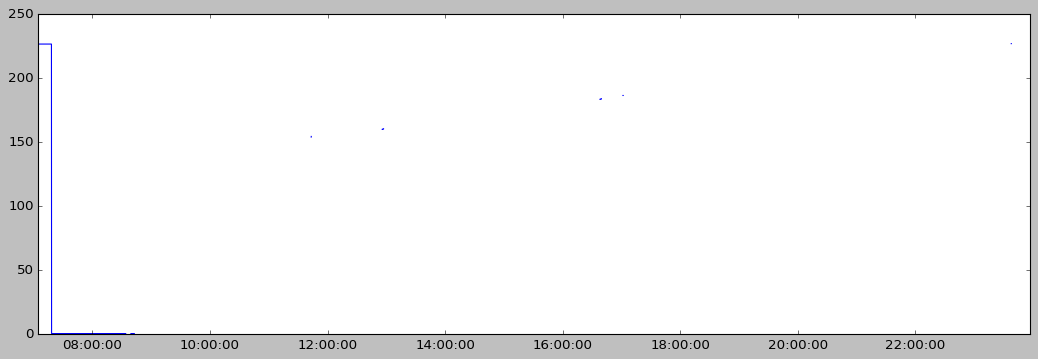

In [20]:
x = df["TIME"].values
y1 = pd.to_numeric(df["DBTV"]).values
y2 = pd.to_numeric(df["DRTM"]).values

plt.figure(figsize=(16,5))
# plt.plot(x, y1)
plt.plot(x, y2)
plt.show()